# Prelib ( Projet de recherche en littérature de langue bretonne)


* Nelly Blanchard, Jean-Baptiste Pressac, et Mannaig Thomas, « [Quand l’informatique soulève des questions épistémologiques dans le domaine de la littérature de langue bretonne : l’exemple de la base de données PRELIB](https://doi.org/10.4000/lbl.315) », La Bretagne Linguistique, no 21 (1 mai 2017): 297‑317.
* Nelly Blanchard, « [La littérature de langue bretonne de l’entre-deux-guerres](https://doi.org/10.4000/lbl.360) », La Bretagne Linguistique, no 22 (1 octobre 2018): 177‑92.
  * C'est ce texte, proposant une analyse du phénomène concerné, qui est mentionné comme "l'article" ci-dessous.


* La base de données dont il est question dans l'article avec la liste des tables qu'elle contient (et qu'on peut inspecter, en interrogeant les données) est disponible ici: [Projet de recherche en littérature de langue bretonne](https://crbc-dataset.huma-num.fr/prelib)
    
* Modèle logique de la base de données: https://mshb.huma-num.fr/static/prelib/documents/CRBC_Schema_Prelib_18_mars_2021.pdf
    
    




In [1]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploration de la base de données

La base de données locale contient les données issues de la base de données en ligne. 

Pour les requêtes utilisées en vue de l'importation des données (réalisée à partir de l'export CSV avec DBeaver) voir le document 'requetes_db/requetes_SQL.sql'.

In [2]:
database = 'requetes_bd/sql_data/prelib_sql.sqlite'

In [5]:
c = sql.connect(database)

In [4]:
# fermer la connexion
c.close()

In [6]:
query = """SELECT *
FROM oeuvres_editions
ORDER BY id, annee_publication 
LIMIT 200;
"""

In [21]:
# connnexion à la base de données

cs= c.cursor()

### exécuter la requëte sur la base de donées SQLite pour récupérer les valeurs que contient la ligne
cs.execute(query)
result_q = []
result_q = cs.fetchall()

print(len(result_q))
result_q[3]

200


(3,
 'Abrege a vuez Cathelineau quenta general eus a generalet armeou catholiq a royal ar Vendee, lequeat e brezonec gant Jacquès Abalan, scolaër e bourg Plouescat',
 3,
 1823,
 5,
 'Jacques Abalain',
 1774,
 '',
 'auteur',
 '',
 'breton')

# Personnes du groupe retenu par l'article

Création de la revue Gwalarn en 1925

---

Les personnes figurant dans le traphique de la page 185 de l'article de Nelly Blanchard, « [La littérature de langue bretonne de l’entre-deux-guerres](https://doi.org/10.4000/lbl.360) », La Bretagne Linguistique, no 22 (1 octobre 2018): 177‑92.


In [8]:
query_personnes = "SELECT * FROM personnes_article"

In [9]:
personnes_article = pd.read_sql_query(query_personnes,c)

In [23]:
### Explorer le contenu de la table
print(len(personnes_article))
personnes_article[:3]

22


,id,nom_usuel,type_art,annee_naissance,nom_etat_civil,prenom_etat_civil,particule_noblesse,sexe,jour_naissance,mois_naissance,wikidata,idref,lustre
0,4,Christophe Jézégou,édif,1864,Jézégou,Christophe,non,M,19,5,Q3199813,178101516,1861-1866
1,10,Yves Berthou,régio,1861,Berthou,Yves Marie,non,M,4,9,Q787167,029665337,1861-1866
2,42,Adrien de Carné,régio,1854,de Carné de Carnavalet,Adrien Ernest Michel Henri Anne,oui,M,5,12,Q21473969,184324335,1851-1856


In [11]:
#  Vue d'ensemble du nombre total et des effectifs par type
print(len(personnes_article))
personnes_article.groupby('type_art').size()

22


type_art
gwalarn           4
régio            13
régio_gwalarn     1
édif              4
dtype: int64

In [9]:
personnes_article[['id','nom_usuel','type_art','annee_naissance','nom_etat_civil','prenom_etat_civil']].sort_values('annee_naissance')

,id,nom_usuel,type_art,annee_naissance,nom_etat_civil,prenom_etat_civil
3,55,Emile Ernault,régio,1852,Ernault,Emile-Jean-Marie
2,42,Adrien de Carné,régio,1854,de Carné de Carnavalet,Adrien Ernest Michel Henri Anne
15,330,Yves Picart,régio,1859,Picart,Yves
10,166,Yves-Marie Madec,édif,1860,Madec,Yves-Marie
14,225,François Vallée,régio_gwalarn,1860,Vallée,Adolphe-François-Marie
8,131,Pierre Le Goff,régio,1860,Le Goff,Pierre-Marie
1,10,Yves Berthou,régio,1861,Berthou,Yves Marie
12,211,Sylvestre Sévéno,édif,1864,Sévéno,Sylvestre
0,4,Christophe Jézégou,édif,1864,Jézégou,Christophe
13,224,Jean-Marie Uguen,édif,1868,Uguen,Jean-Marie


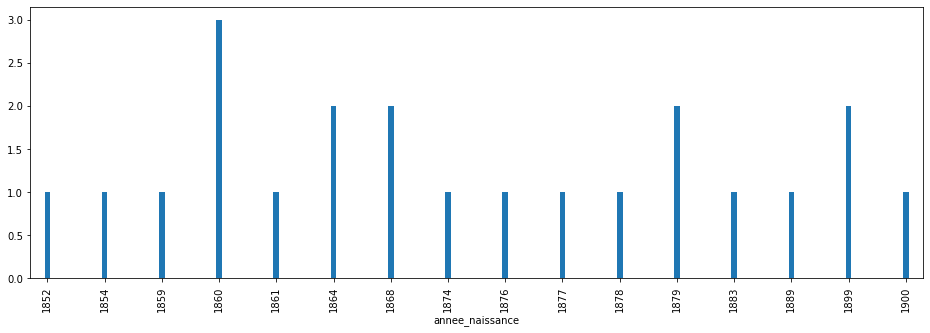

In [24]:
###  Regroupement par année de naissance 
#   Représentation biaisée (manquent des années)

annee_naissance = personnes_article.groupby('annee_naissance').size()
annee_naissance[:10]
annee_naissance.plot(kind='bar',width=0.1,  figsize=(16,5))
plt.show()

In [14]:
###  Une autre méthode de regroupement
count_annees = [[l,v] for l,v in personnes_article['annee_naissance'].value_counts().iteritems()]
count_annees.sort(key=lambda x: int(x[0]))
count_annees[2:5]

[[1859, 1], [1860, 3], [1861, 1]]

## Distribution des naissances de la population des personnes retenues dans l'article

In [25]:
annee_liste = [x for x in range(1851, 1901)]
annee_effectifs = []

for a in annee_liste:
    if a in annee_naissance.index:
        for e in zip(annee_naissance.index,annee_naissance.tolist()):
            if a == e[0]:
                annee_effectifs.append([a, e[1]])
    else :    
        annee_effectifs.append([a, 0])
# annee_effectifs[:10]
liste_annees = pd.DataFrame(annee_effectifs, columns=['annee', 'effectif'])
liste_annees[7:12]

,annee,effectif
7,1858,0
8,1859,1
9,1860,3
10,1861,1
11,1862,0


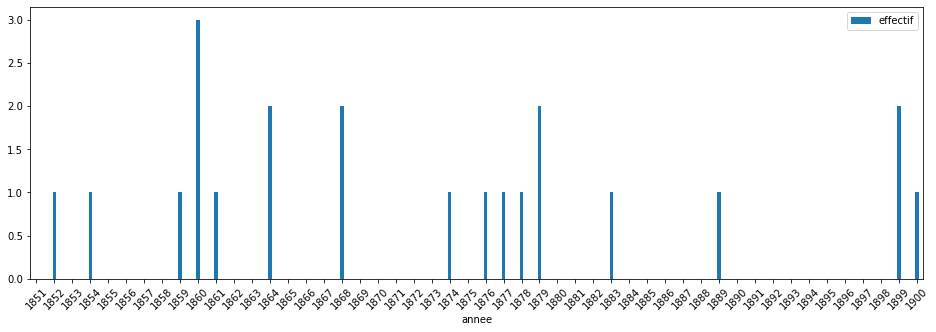

In [27]:
pd.DataFrame(liste_annees).plot(x = 'annee', y = 'effectif',kind='bar',width=0.2,  figsize=(16,5))
plt.xticks(rotation=45)
plt.show()

In [17]:
lustres = [x for x in range(1851,1905, 5)]
lustres

[1851, 1856, 1861, 1866, 1871, 1876, 1881, 1886, 1891, 1896, 1901]

In [18]:
### Créer une copie indépendante du DataFrame (attention aux copies de variables qui sont seulement des alias) 
# et coder les années de naissance en relation avec les lustres
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html


personnes_article['lustre'] = pd.cut(personnes_article['annee_naissance'], lustres, right=False)
### Transformer le code ajouté pour qu'il soit plus lisible
personnes_article['lustre'] = personnes_article['lustre'].apply(lambda row : str(int(row.left))+'-'+str(int(row.right)))

## Inspection
# personnes_article

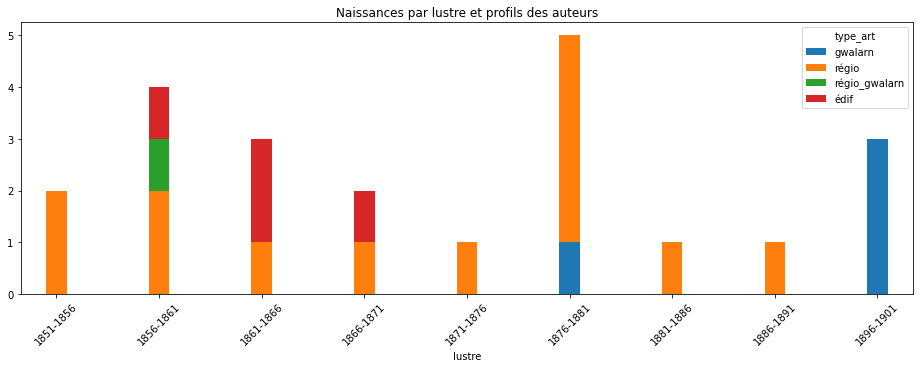

In [20]:
###  Distribution par lustre de naissance et profil des auteurs

X = 'type_art'
Y = 'lustre'
    
g = personnes_article[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len) \
        .fillna(0).astype(int).sort_values(by=Y, ascending=True) \
        .plot( kind='bar', stacked=True,  width=0.2,  figsize=(16,5),  title = "Naissances par lustre et profils des auteurs")
plt.xticks(rotation=45)
plt.show()

### Remarques

Noter : 
* la position de [François Vallée](https://fr.wikipedia.org/wiki/Fran%C3%A7ois_Vall%C3%A9e_(linguiste)), le linguiste cf. p. 191 et le graphe p. 189 – il s'agit de l'auteur né en 1860 qui fait le pont entre régionalistes et nationalistes
* le rôle d'intermédiaire de [Meven Mordiern](https://fr.wikipedia.org/wiki/Meven_Mordiern), né en 1878, cf. graphe p. 189. "Meven Modiern, René Le Roux à l'état-civil, est un écrivain de langue bretonne, un érudit spécialiste de civilisation celtique et le principal collaborateur du linguiste François Vallée" (Wikipedia)


## Publications en breton

In [30]:
query = """
SELECT *                           
FROM oeuvres_editions   --3259         
WHERE annee_publication > 1850 --; --2828  
AND langues LIKE '%breton%';  --2691       
"""

In [31]:
publications = pd.read_sql_query(query,c)

In [35]:
print(len(publications))
publications[:3]

2691


,id,titre,id_ed,annee_publication,id_personne,nom_usuel,annee_naissance,annee_deces,fonctions,types,langues
0,1,Em Breiz-Izel,1,1885,23,Jean Cadiou,1834,,auteur,,breton
1,2,En Est-La Moisson,2,1897,22,Jean-Mathurin Cadic,1843,1917,"auteur,auteur","Poésie,Poésie","français,breton"
2,2,En Est-La Moisson,625,1927,22,Jean-Mathurin Cadic,1843,1917,auteur,Poésie,breton


## Auteurs et traducteurs

In [40]:
(publications.groupby('fonctions').size()).sort_values(ascending=False)

fonctions
auteur                                         1616
co-auteur                                       360
traducteur                                      191
auteur,auteur                                   104
illustrateur                                     90
préfacier                                        79
                                                 45
conteur                                          29
[fonction à préciser]                            24
éditeur scientifique                             23
introducteur                                     21
adaptateur                                       18
traducteur,traducteur                            13
compositeur                                      12
préfacier,préfacier                              11
auteur de l'exergue                               8
correcteur sur épreuves                           5
traducteur,chanteur                               4
traducteur,préfacier,chanteur                     4
ch

In [153]:
### Restreindre aux auteurs et traducteurs
print(len(publications[publications['fonctions'].str.contains("auteur|traducteur")]))
# (publications[publications['fonctions'].str.contains("auteur|traducteur")].groupby('fonctions').size()).sort_values(ascending=False)

2315


## Fusionner table éditions et auteurs retenus dans l'article

In [49]:
personnes_article[:3]

,id,nom_usuel,type_art,annee_naissance,nom_etat_civil,prenom_etat_civil,particule_noblesse,sexe,jour_naissance,mois_naissance,wikidata,idref,lustre
0,4,Christophe Jézégou,édif,1864,Jézégou,Christophe,non,M,19,5,Q3199813,178101516,1861-1866
1,10,Yves Berthou,régio,1861,Berthou,Yves Marie,non,M,4,9,Q787167,029665337,1861-1866
2,42,Adrien de Carné,régio,1854,de Carné de Carnavalet,Adrien Ernest Michel Henri Anne,oui,M,5,12,Q21473969,184324335,1851-1856


In [75]:
### Fusionner les tables éditions et personnes retenues dans l'article
publications_merged = publications[publications['fonctions'].str.contains("auteur|traducteur")].merge(personnes_article, left_on = 'id_personne', right_on ='id', how='left', indicator=True)
pm = publications_merged
print('Effectif des publications retenues : ', len(pm), '\n')
pm[170:172]

Effectif des publications retenues :  2315 



,id_x,titre,id_ed,annee_publication,id_personne,nom_usuel_x,annee_naissance_x,annee_deces,fonctions,types,...,nom_etat_civil,prenom_etat_civil,particule_noblesse,sexe,jour_naissance,mois_naissance,wikidata,idref,lustre,_merge
170,202,Gwin person Koataskorn,188,1904,67,Charles Guennou,1851,1915,traducteur,Recueil de poèmes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
171,203,Nozveziou Breiz,189,1903,67,Charles Guennou,1851,1915,auteur,Poésie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [63]:
pm.columns

Index(['id_x', 'titre', 'id_ed', 'annee_publication', 'id_personne',
       'nom_usuel_x', 'annee_naissance_x', 'annee_deces', 'fonctions', 'types',
       'langues', 'id_y', 'nom_usuel_y', 'type_art', 'annee_naissance_y',
       'nom_etat_civil', 'prenom_etat_civil', 'particule_noblesse', 'sexe',
       'jour_naissance', 'mois_naissance', 'wikidata', 'idref', 'lustre',
       '_merge'],
      dtype='object')

In [54]:
### Toutes les publications et celles des auteurs retenus pour l'article
pm.groupby('_merge').size()

_merge
left_only     2167
right_only       0
both           524
dtype: int64

## Distribution des publications dans le temps

In [98]:
min(pm['annee_publication']), max(pm['annee_publication'])

(1851, 2017)

In [100]:
lustres = [x for x in range(1851,2017, 5)]
lustres[:5],lustres[-5:]

([1851, 1856, 1861, 1866, 1871], [1996, 2001, 2006, 2011, 2016])

In [101]:
### Créer une copie indépendante du DataFrame (attention aux copies de variables qui sont seulement des alias) 
# et coder les années de publication en relation avec les lustres

pm['lustre'] = pd.cut(pm['annee_publication'], lustres, right=False)
### Transformer le code ajouté pour qu'il soit plus lisible
pm['lustre'] = pm['lustre'].apply(lambda row : str(int(row.left))+'-'+str(int(row.right)))

## Inspection
pm[:2]

,id_x,titre,id_ed,annee_publication,id_personne,nom_usuel_x,annee_naissance_x,annee_deces,fonctions,types,...,nom_etat_civil,prenom_etat_civil,particule_noblesse,sexe,jour_naissance,mois_naissance,wikidata,idref,lustre,_merge
0,1,Em Breiz-Izel,1,1885,23,Jean Cadiou,1834,,auteur,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1881-1886,left_only
1,2,En Est-La Moisson,2,1897,22,Jean-Mathurin Cadic,1843,1917,"auteur,auteur","Poésie,Poésie",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896-1901,left_only


In [102]:
pm.columns

Index(['id_x', 'titre', 'id_ed', 'annee_publication', 'id_personne',
       'nom_usuel_x', 'annee_naissance_x', 'annee_deces', 'fonctions', 'types',
       'langues', 'id_y', 'nom_usuel_y', 'type_art', 'annee_naissance_y',
       'nom_etat_civil', 'prenom_etat_civil', 'particule_noblesse', 'sexe',
       'jour_naissance', 'mois_naissance', 'wikidata', 'idref', 'lustre',
       '_merge'],
      dtype='object')

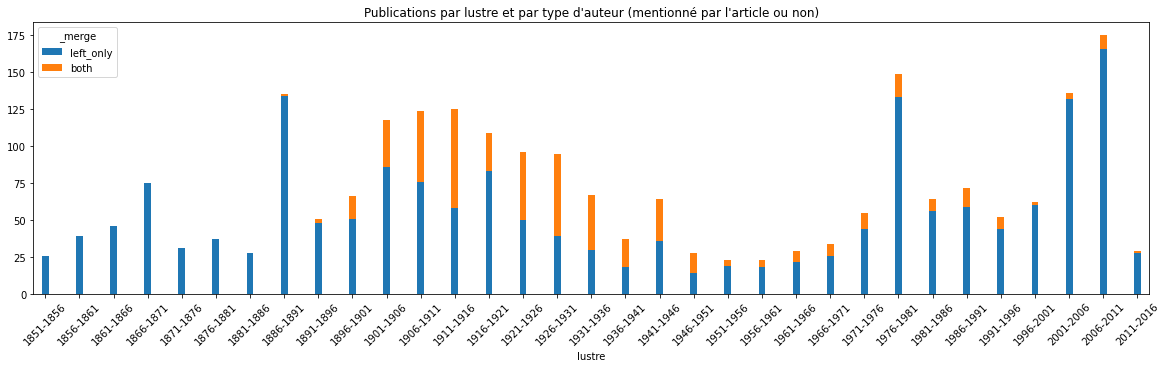

In [154]:
### Publications des auteurs mentionnées dans l'article ('both') et tous les autres


X = 'lustre'
Y = '_merge'
    
g = pm[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len) \
        .fillna(0).astype(int).sort_values(by=X, ascending=True) \
        .plot( kind='bar', stacked=True,  width=0.2,  figsize=(20,5),  title = "Publications par lustre et par type d'auteur (mentionné par l'article ou non)")
plt.xticks(rotation=45)
plt.show()

In [119]:
pm['type_art'] = pm['type_art'].fillna('non_traites')
pm.groupby('type_art').size().sort_values(ascending=False)

type_art
non_traites      1827
régio             242
gwalarn           148
édif               79
régio_gwalarn      19
dtype: int64

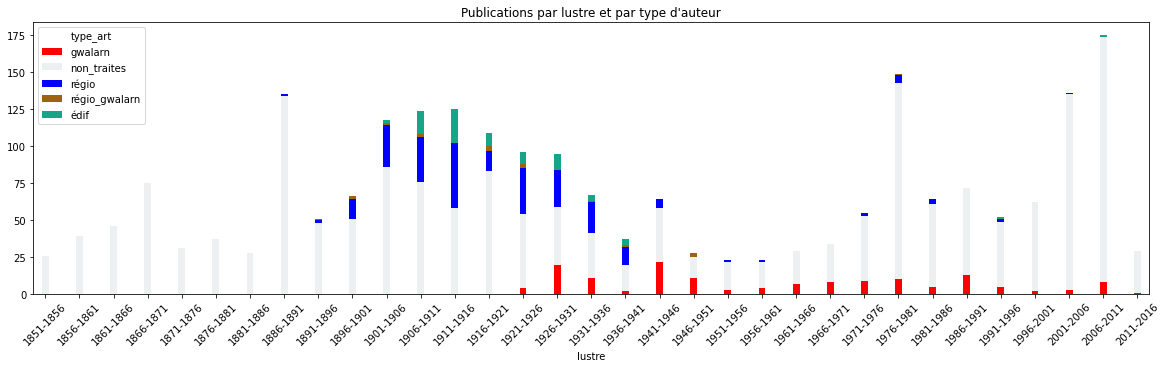

In [120]:
### Publications des auteurs mentionnées dans l'article ('both') et tous les autres



X = 'lustre'
Y = 'type_art'
    
g = pm[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len) \
        .fillna(0).astype(int).sort_values(by=X, ascending=True) \
        .plot( kind='bar', stacked=True,  width=0.2,  figsize=(20,5),  title = "Publications par lustre et par type d'auteur"\
             , color={'gwalarn':'red', 'régio':'blue', 'édif':'#17A589', 'régio_gwalarn':'#9C640C', 'non_traites':'#ECF0F1'})
plt.xticks(rotation=45)
plt.show()

In [121]:
### Toutes les publications et celles des auteurs retenus pour l'article
g_pm = pm[pm['annee_publication'].between(1880, 2020, inclusive=False)].groupby('_merge').size()
g_pm

_merge
left_only     1573
right_only       0
both           488
dtype: int64

In [122]:
### Toutes les publications et celles des auteurs retenus pour l'article
g_pm = pm[pm['annee_publication'].between(1918, 1940, inclusive=False)].groupby('_merge').size()
g_pm

_merge
left_only     143
right_only      0
both          165
dtype: int64

## Publications des personnes contemporaines de celles retenues dans l'article

In [123]:
pm_ne_apres_1850 = pm[pm['annee_naissance_x'].astype('string') > '1850'].sort_values(['annee_naissance_x','annee_publication'])
len(pm_ne_apres_1850)

1514

In [124]:
pm_ne_apres_1850.groupby('_merge').size()

_merge
left_only     1026
right_only       0
both           488
dtype: int64

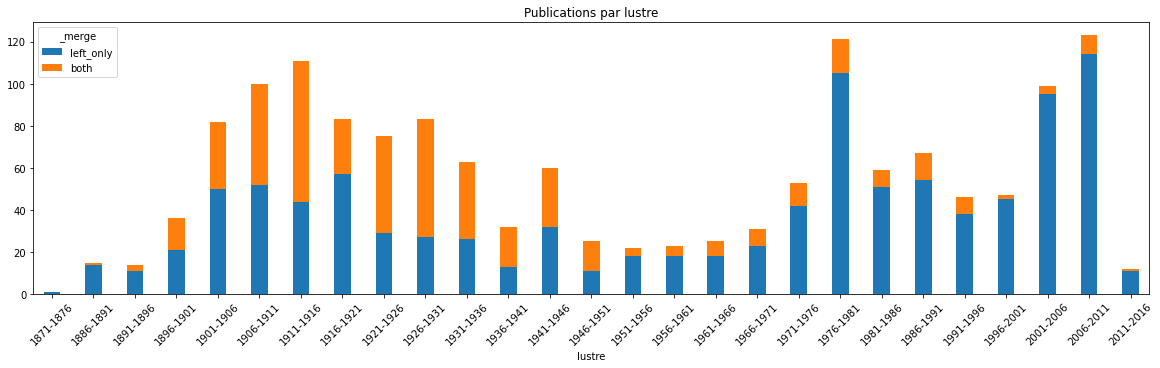

In [156]:
X = '_merge'
Y = 'lustre'
    
g = pm_ne_apres_1850[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len) \
        .fillna(0).astype(int).sort_values(by=Y, ascending=True) \
        .plot( kind='bar', stacked=True,  width=0.4,  figsize=(20,5),  title = 'Publications par lustre')
plt.xticks(rotation=45)
plt.show()

In [148]:
eff_publications_par_personne = pm_ne_apres_1850.groupby('nom_usuel_x').size().sort_values(ascending=False)
eff_publications_par_personne[:30]

nom_usuel_x
Roparz Hemon            97
Adrien de Carné         38
Sylvestre Sévéno        38
Pierre-Jakez Hélias     38
François Jaffrennou     33
Loeiz Herrieu           31
Per Denez               30
Youenn Drezen           25
Yves Ollivier           25
Yves Berthou            23
Charles Le Goffic       23
Yves Le Moal            23
Fañch Eliès Abeozen     22
Auguste Dupouy          20
Joseph Le Bayon         20
Jean-Marie Perrot       19
François Vallée         19
Maodez Glanndour        18
Mikael Madeg            18
Goulc'han Kervella      17
Claude-Marie Le Prat    17
Jean-Marie Uguen        16
Toussaint Le Garrec     15
Emile Ernault           15
Frañsez Kervella        14
Yves-Marie Madec        13
Jakez Riou              13
Meven Mordiern          13
Pierre Le Goff          13
Anatole Le Braz         12
dtype: int64

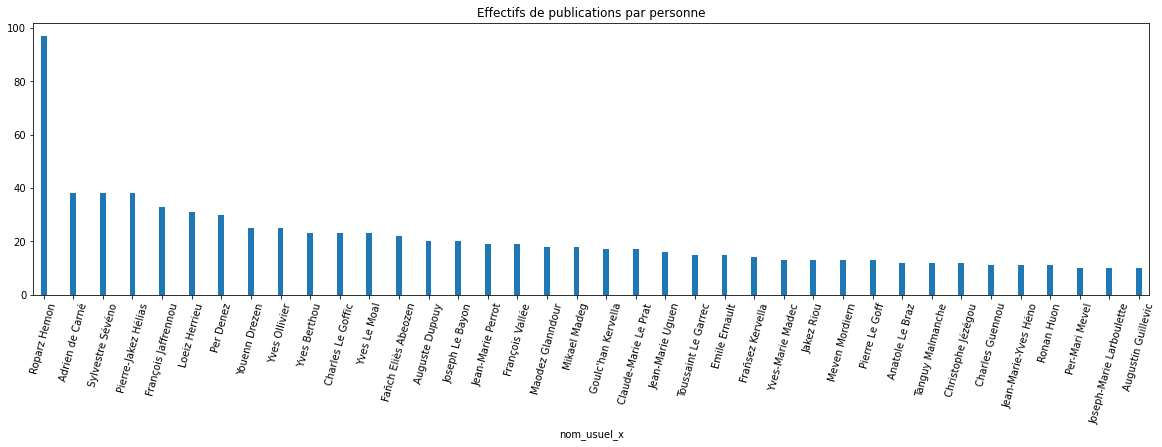

In [149]:
eff_publications_par_personne[eff_publications_par_personne > 9].plot( kind='bar', stacked=True,  width=0.2,  figsize=(20,5),  title = 'Effectifs de publications par personne')
plt.xticks(rotation=75)
plt.show()

<AxesSubplot:>

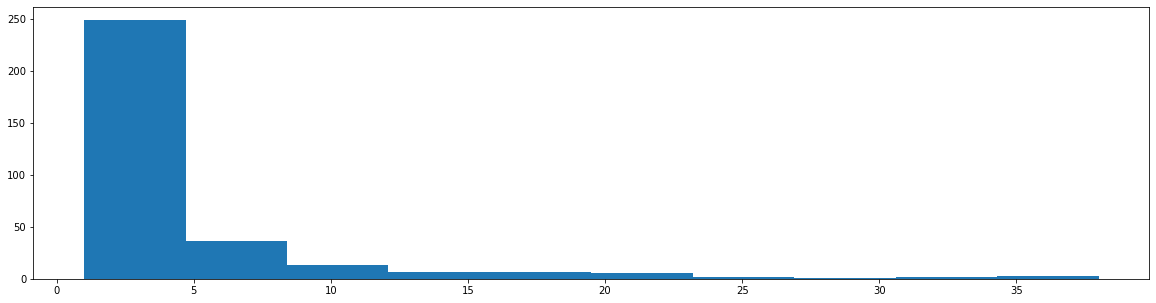

In [164]:
### https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.hist.html#pandas.Series.hist
eff_publications_par_personne[eff_publications_par_personne < 50].hist(figsize=(20,5), grid=False)

In [169]:
###  Attention : mettre ou enlever auteur – traducteur
eff_publications_limite = pm_ne_apres_1850[(pm_ne_apres_1850['annee_publication'].between(1918,1940,inclusive=False)) \
                                           ### auteur|traducteur
                                           & (pm_ne_apres_1850['fonctions'].str.contains("auteur|traducteur"))]\
                .groupby('nom_usuel_x').size().sort_values(ascending=False)
'Effectif : ' + str(len(eff_publications_limite)), eff_publications_limite[:30]


('Effectif : 77',
 nom_usuel_x
 Adrien de Carné         24
 Roparz Hemon            21
 Jean-Marie Perrot       11
 Jean-Marie-Yves Héno     9
 Loeiz Herrieu            9
 Jean-Marie Uguen         9
 Christophe Jézégou       8
 Charles Le Goffic        8
 Emile Ernault            7
 Yves Le Moal             7
 Auguste Dupouy           7
 François Vallée          6
 Youenn Drezen            6
 Sylvestre Sévéno         6
 Meven Mordiern           6
 Pierre Le Goff           5
 Yves-Marie Madec         5
 Joseph Le Bayon          5
 François Ménez           5
 Yves Picart              5
 Yves Le Bec              5
 Yves Berthou             5
 Jakez Riou               4
 Toussaint Le Garrec      4
 Octave-Louis Aubert      3
 François Jaffrennou      3
 Jean-Louis Rozec         3
 Julien Clisson           3
 Augustin Guillevic       3
 Pierre Martin            2
 dtype: int64)

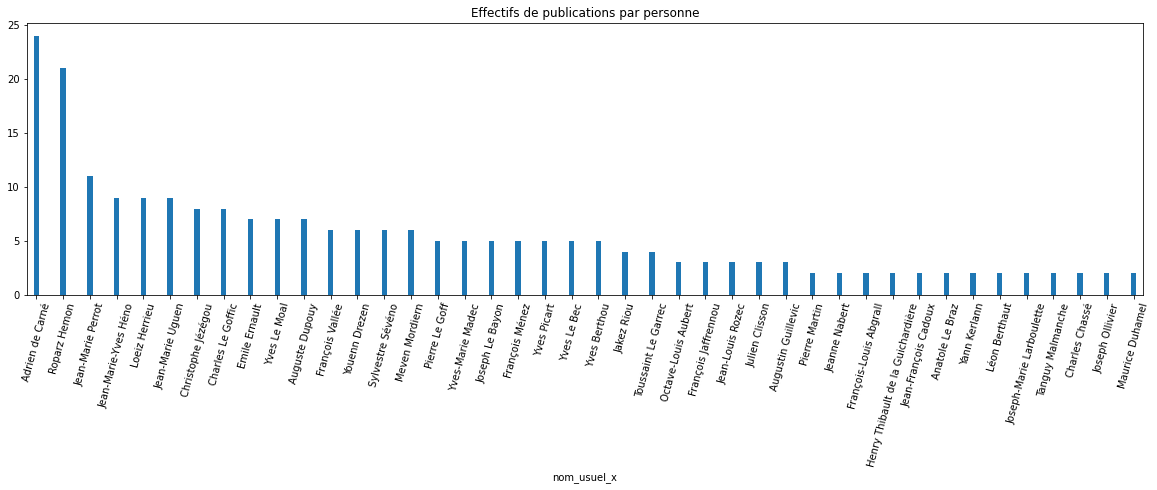

In [152]:
eff_publications_limite[eff_publications_limite > 1].plot( kind='bar', stacked=True,  width=0.2,  figsize=(20,5),  title = 'Effectifs de publications par personne')
plt.xticks(rotation=75)
plt.show()

## Types de publications

Regroupement en trois catégories : edification, erudition, litterature

In [171]:
pm_types = pm.groupby('types').size()
pm_types = pm_types.sort_values(ascending = False)
pm_types

types
                                                                               889
Littérature religieuse                                                         279
Chant (chanson, gwerz, cantate...)                                             215
Essai (étude, article, thèse...)                                               185
Théâtre                                                                        175
Poésie                                                                         107
Outil linguistique,Outil linguistique                                           74
Recueil de poèmes                                                               61
Cantique                                                                        55
Roman                                                                           39
Outil linguistique                                                              39
Conte                                                                           3

### Coder les types de publications

In [184]:
def parse_values(x):
    if 'relig' in x or 'antiq' in x :
       return 'edification'
    elif 'Chant' in x or 'Théa' in x or 'Poés' in x \
    or 'Poés' in x or 'Roma' in x or 'onte' in x \
    or 'ouvel' in x or 'auto' in x :
       return 'litterature'
    elif 'Manuel' in x or 'Essai' in x or 'Corresp' in x or 'Outil' in x:
       return 'erudition'
    else:
       return 'sans_type'


In [225]:
pm['genre_code'] = pm['types'].apply(parse_values)
pm[:2]

,id_x,titre,id_ed,annee_publication,id_personne,nom_usuel_x,annee_naissance_x,annee_deces,fonctions,types,...,prenom_etat_civil,particule_noblesse,sexe,jour_naissance,mois_naissance,wikidata,idref,lustre,_merge,genre_code
0,1,Em Breiz-Izel,1,1885,23,Jean Cadiou,1834,,auteur,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1881-1886,left_only,sans_type
1,2,En Est-La Moisson,2,1897,22,Jean-Mathurin Cadic,1843,1917,"auteur,auteur","Poésie,Poésie",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896-1901,left_only,litterature


In [186]:
pm.groupby('genre_code').size()

genre_code
edification     364
erudition       312
litterature     458
sans_type      1181
dtype: int64

In [203]:
pm[pm['annee_publication'].between(1918,1940,inclusive=False)].groupby('genre_code').size()

genre_code
edification     60
erudition       44
litterature     61
sans_type      143
dtype: int64

In [187]:
### Toute la période

X = 'type_art'
Y = 'genre_code'
g_pm = pm[[Y,X]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total") \
        .fillna(0).astype(int)

In [200]:
### Entre-deux-guerres

X = 'type_art'
Y = 'genre_code'
g_pm = pm[pm['annee_publication'].between(1918,1940,inclusive=False)][[Y,X]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total") \
        .fillna(0).astype(int)

In [233]:
### Entre-deux-guerres et codés

X = 'type_art'
Y = 'genre_code'
g_pm = pm[(pm['annee_publication'].between(1915,1940,inclusive=False)) & (pm['type_art'].str.contains('non_t') == False)][[Y,X]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total") \
        .fillna(0).astype(int)

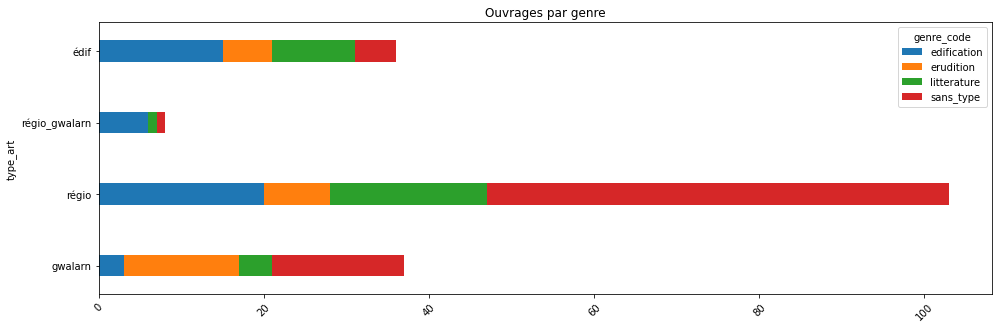

In [234]:
g_pm.iloc[:-1,:-1].plot( kind='barh', stacked=True,  width=0.3,  figsize=(16,5),  title = 'Ouvrages par genre')
plt.xticks(rotation=45)
plt.show()

### Analyse bivariée

In [235]:
g_pm

genre_code,edification,erudition,litterature,sans_type,Total
type_art,,,,,
gwalarn,3,14,4,16,37
régio,20,8,19,56,103
régio_gwalarn,6,0,1,1,8
édif,15,6,10,5,36
Total,44,28,34,78,184


In [236]:
### Total général, dernière cellule de la dernière ligne
g_pm.iat[-1,-1]

184

In [237]:
g_pm.iloc[:-1,:-1]

genre_code,edification,erudition,litterature,sans_type
type_art,,,,
gwalarn,3,14,4,16
régio,20,8,19,56
régio_gwalarn,6,0,1,1
édif,15,6,10,5


In [238]:
tx = g_pm.loc[:,["Total"]]
ty = g_pm.loc[["Total"],:]
n = g_pm.iat[-1,-1]   # .iloc[:-1,:-1] 

### Compute the matrix multiplication between the columns.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html
indep = tx.dot(ty) / n
#pd.options.display.float_format = '{0:3.5}'.format

# Arrondi
print(indep.astype(int))


genre_code     edification  erudition  litterature  sans_type  Total
type_art                                                            
gwalarn                  8          5            6         15     37
régio                   24         15           19         43    103
régio_gwalarn            1          1            1          3      8
édif                     8          5            6         15     36
Total                   44         28           34         78    184


In [239]:
### Différence en effectifs entre le théorique et l'observé
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts = (g_pm-indep)
## Attention : arrondi aux entiers dans l'affichage
print(ecarts.iloc[:-1,:-1].astype(int))


genre_code     edification  erudition  litterature  sans_type
type_art                                                     
gwalarn                 -5          8           -2          0
régio                   -4         -7            0         12
régio_gwalarn            4         -1            0         -2
édif                     6          0            3        -10


In [240]:
### Ecarts positifs et pondérés par les effectifs
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts_ponderes = ((g_pm-indep)**2/indep).iloc[:-1,:-1]
ecarts_ponderes

genre_code,edification,erudition,litterature,sans_type
type_art,,,,
gwalarn,3.865025,12.441246,1.177179,0.006335
régio,0.870505,3.757131,0.000056,3.485797
régio_gwalarn,8.731225,1.217391,0.154731,1.686176
édif,4.745059,0.049689,1.684854,6.899046


50.77144634454744


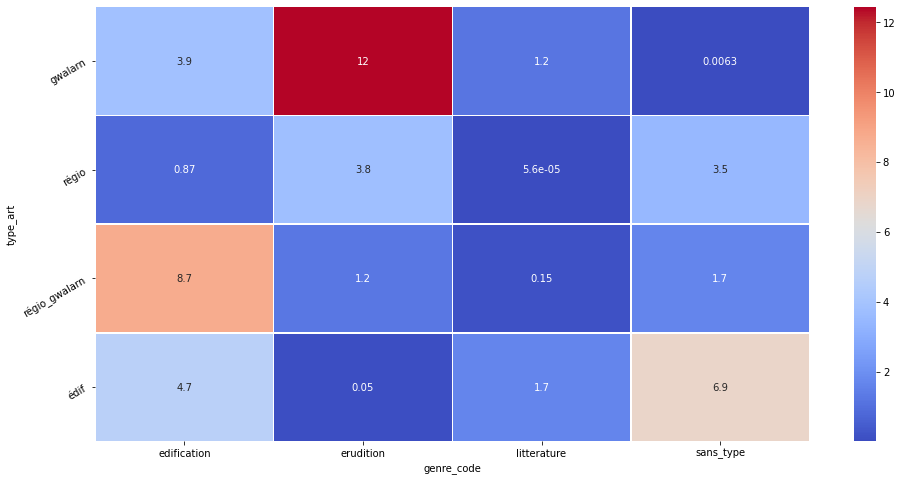

In [241]:
## Chi2 :somme des écarts pondérés

xi_n = ecarts_ponderes.sum().sum() 
print(xi_n)

table = ecarts_ponderes/xi_n
fig, ax = plt.subplots(figsize=(16,8))         
# Sample figsize in inches
g = sns.heatmap(ecarts_ponderes, annot=ecarts_ponderes, cmap="coolwarm", linewidths=.5, ax=ax)
labels = ecarts_ponderes.index
p = g.set_yticklabels(labels, rotation=30)

In [232]:
### Tableau de contingence décennies-nationalités : effectifs

X = "lustre"  
Y = "type_art"

lustre_type_publi = pm[(pm['annee_publication'].between(1915,1940,inclusive=False)) & (pm['type_art'].str.contains('non_t') == False)][[X,Y]]\
                   .pivot_table(index=X,columns=Y,aggfunc=len).fillna(0).astype(int) 
lustre_type_publi

type_art,gwalarn,régio,régio_gwalarn,édif
lustre,,,,
1916-1921,0,14,3,9
1921-1926,4,31,3,8
1926-1931,20,25,0,11
1931-1936,11,21,1,4
1936-1941,2,12,1,4


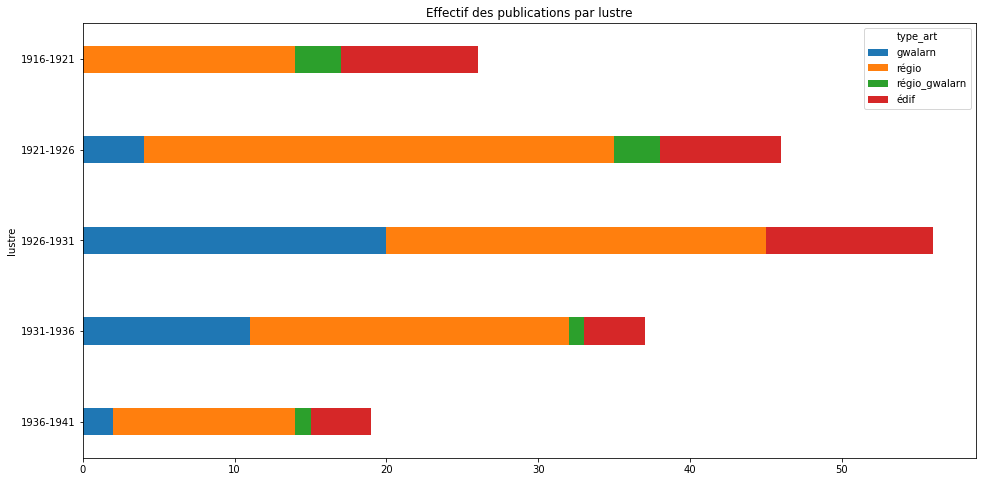

In [230]:
g = lustre_type_publi.sort_index(ascending=False).plot( kind='barh', stacked=True,  width=0.3,  figsize=(16,8),  title = 'Effectif des publications par lustre')

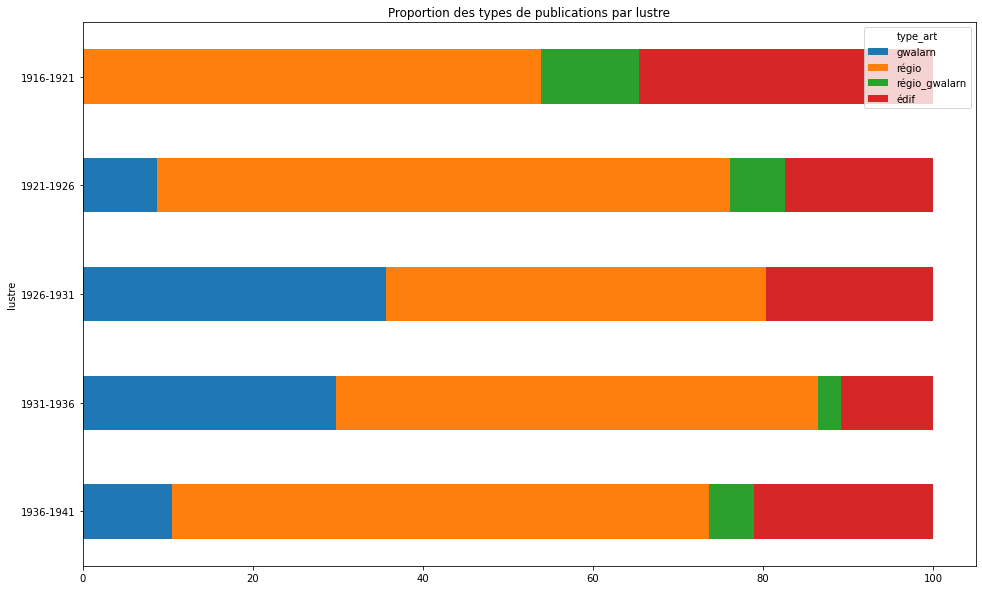

In [231]:
### https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/
stacked_data = lustre_type_publi.sort_index(ascending=False).apply(lambda x: x*100/sum(x), axis=1)
p = stacked_data.plot(kind="barh", stacked=True, figsize=(16,10), title='Proportion des types de publications par lustre')